In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
csv_file_name = 'all_accounts_filtered_2.csv'
main_dir_path = os.path.dirname(os.getcwd())
csv_file_path = os.path.join(main_dir_path, 'Data', 'FINAL_DATASETS', csv_file_name)
final_df_1 = pd.read_csv(csv_file_path)
final_df_1 = final_df_1.loc[:, ~final_df_1.columns.str.contains('^Unnamed')]
final_df_1

,accountName,SubmToCommentRatio,label,daily_downtime
0,BlackToLive,9.333333,1,9.000000
1,FaurnFlamebreaker,1.000000,1,5.816514
2,Bill_Jonson,1.000000,1,5.816514
3,PurebringerOghmagra,6.000000,1,5.816514
4,Clawisma,6.750000,1,3.000000
...,...,...,...,...
547,reticulated_python,0.056968,0,8.000000
548,Zamoon,0.452830,0,8.000000
549,jrwhite8,0.001130,0,14.000000
550,Sean3ezy,0.197687,0,3.000000


In [3]:
final_df_1.drop(columns= ['accountName', 'label'], inplace=True)
temp_array = np.array(final_df_1.SubmToCommentRatio)

temp_array = (temp_array - temp_array.min()) / (temp_array.max() - temp_array.min())
temp_array *= 24

final_df_1.SubmToCommentRatio = temp_array

final_df_1

,SubmToCommentRatio,daily_downtime
0,0.358357,9.000000
1,0.038357,5.816514
2,0.038357,5.816514
3,0.230357,5.816514
4,0.259157,3.000000
...,...,...
547,0.002144,8.000000
548,0.017345,8.000000
549,0.000000,14.000000
550,0.007548,3.000000


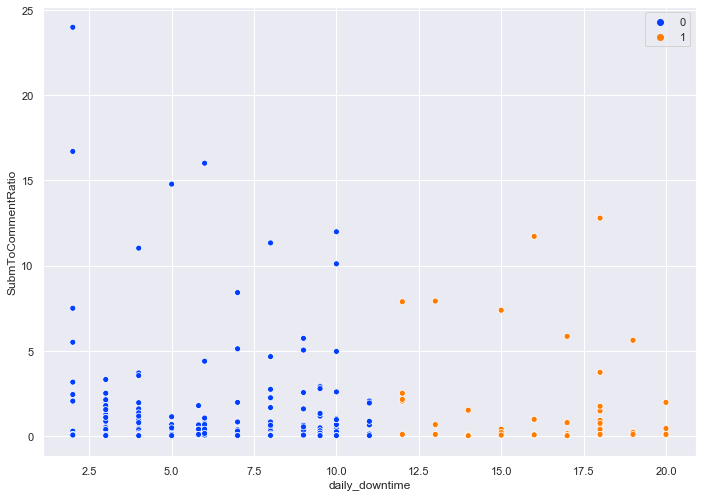

In [8]:
inertia_list = []

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

sns.scatterplot(final_df_1['daily_downtime'], final_df_1['SubmToCommentRatio'], hue=y, legend='full', palette=palette)

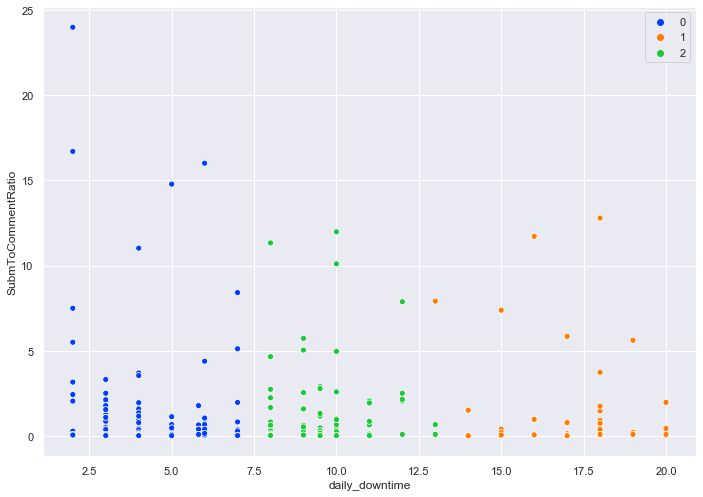

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

sns.scatterplot(final_df_1['daily_downtime'], final_df_1['SubmToCommentRatio'], hue=y, legend='full', palette=palette)

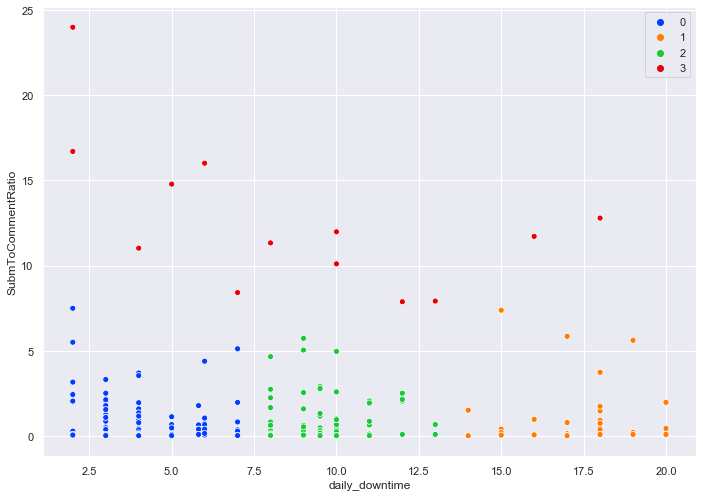

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 4)

sns.scatterplot(final_df_1['daily_downtime'], final_df_1['SubmToCommentRatio'], hue=y, legend='full', palette=palette)

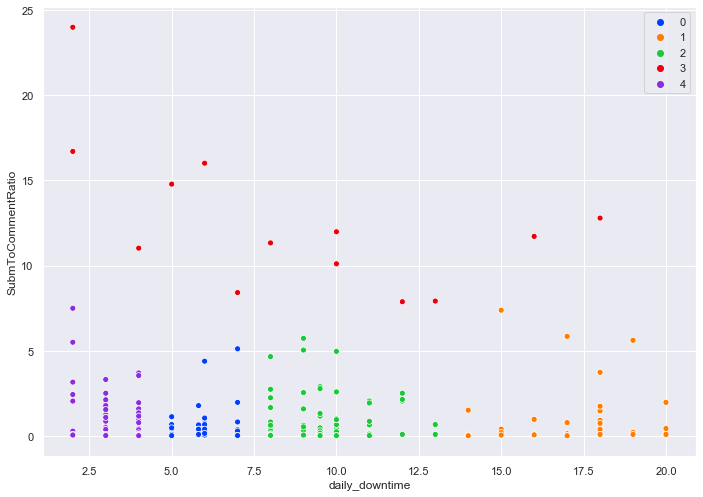

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 5)

sns.scatterplot(final_df_1['daily_downtime'], final_df_1['SubmToCommentRatio'], hue=y, legend='full', palette=palette)

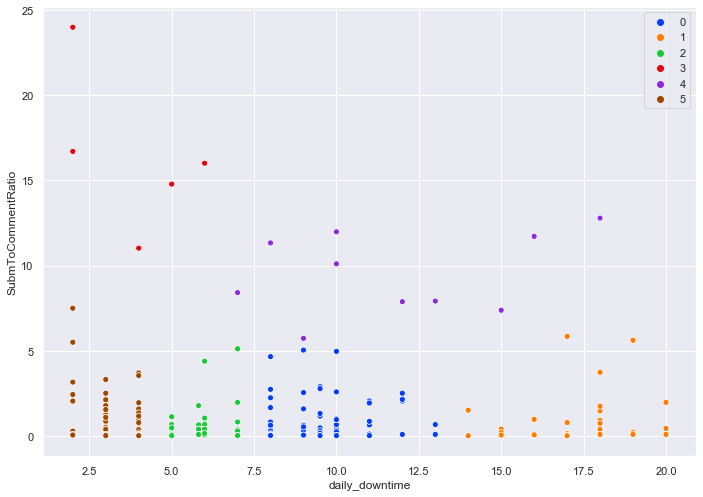

In [12]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 6)

sns.scatterplot(final_df_1['daily_downtime'], final_df_1['SubmToCommentRatio'], hue=y, legend='full', palette=palette)

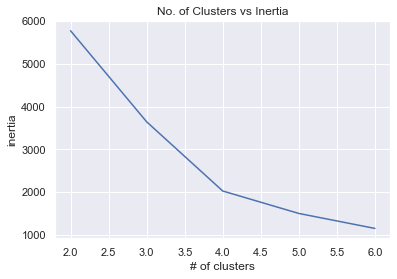

In [13]:
%matplotlib inline
n_clusters = list(range(2, 7))

plt.plot(n_clusters, inertia_list)
plt.xlabel('# of clusters')
plt.ylabel('inertia')

plt.title('No. of Clusters vs Inertia')
plt.show()